In [1]:
# 1. Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Veriyi csv formatında import et

data_path = "/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/housing.csv"

housing_data = pd.read_csv(data_path, na_values=['?'])

print(housing_data.isna().sum())

print("\n")

housing_data.dropna(inplace=True)

print(housing_data.isna().sum())

print("\n")


# 4. Lineer regresyon modelini kur

# "longitude", "latitude", "ocean_proximity" değişkenlerini veriden çıkar
features = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

X = housing_data[features]

print("X Deişkenleri:","\n", X)

print("\n")

y = housing_data["median_house_value"]

print("Y Hedef Değişkeni:", "\n", y)

print("\n")

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Doğrusal regresyon modelini oluştur
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Tahmin yapılacak değerler için veri oluştur

new_data = {"housing_median_age": [30],
            "total_rooms": [1500],
            "total_bedrooms": [250],
            "population": [350],
            "households": [400],
            "median_income": [1800]}
new_data_df = pd.DataFrame(new_data)

# 8. Tahmin yap
predicted_value = model.predict(new_data_df)
print("Tahmin Edilen Median Ev Değeri:", predicted_value)

# 9. Modelin doğruluk oranlarını yazdır
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Eğitim seti doğruluk skoru:", train_accuracy)
print("Test seti doğruluk skoru:", test_accuracy)


# 10. Modelin değerlendirilmesi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# SST, SSR ve SSE hesaplama
mean_y_train = np.mean(y_train)
sst = np.sum((y_train - mean_y_train) ** 2)
ssr = np.sum((y_pred_train - mean_y_train) ** 2)
sse = np.sum((y_train - y_pred_train) ** 2)

# R2 skorunu hesaplama
r2_train = ssr / sst

print("\nSST (Toplam Kareler Toplamı):", sst)
print("SSR (Regresyon Kareler Toplamı):", ssr)
print("SSE (Artıkların Kareler Toplamı):", sse)
print("R2 skoru:", r2_train)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


X Deişkenleri: 
        housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...        

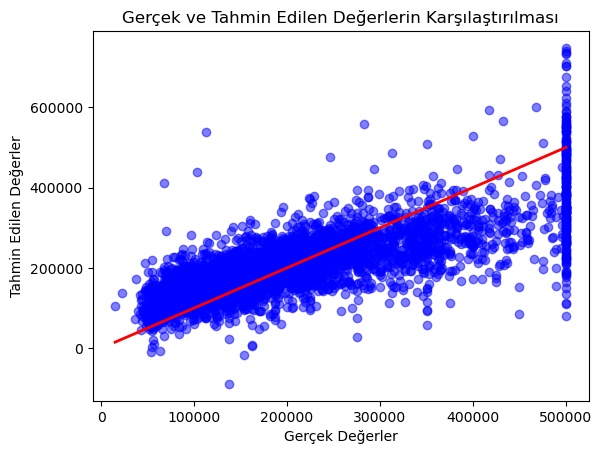

In [14]:
# 9. Tahmini görselleştir
plt.scatter(y_test, model.predict(X_test), color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması")
plt.show()